In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
data.shape

(800, 22)

In [7]:
data.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [8]:
pd.set_option("display.max_columns", None)

In [9]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [11]:
data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [12]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [13]:
for column, value in data.items():
    print(column, value.nunique())
    print(value.unique())
    print()

ID 800
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [14]:
data["age"] = data["age"].astype(int)

In [15]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [16]:
for col in data.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, data[col].unique())
    print("-"*20)

A1_Score [1 0]
--------------------
A2_Score [0 1]
--------------------
A3_Score [1 0]
--------------------
A4_Score [0 1]
--------------------
A5_Score [1 0]
--------------------
A6_Score [0 1]
--------------------
A7_Score [1 0]
--------------------
A8_Score [0 1]
--------------------
A9_Score [1 0]
--------------------
A10_Score [1 0]
--------------------
gender ['f' 'm']
--------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------
jaundice ['no' 'yes']
--------------------
austim ['no' 'yes']
--------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' '

In [17]:
data = data.drop(columns = ["ID", "age_desc"], axis = 1)

In [18]:
data.shape

(800, 20)

In [19]:
print(data["contry_of_res"].value_counts())

contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
France                   10
Spain                    10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Bahamas                   6
Italy                     6
Malaysia                  6
Viet Nam                  5
Nicaragua                 4
Pakistan                  4
Armenia                   4
AmericanSamoa             4
Iraq                      4
Azerbaijan                4
Aruba                     4
Saudi Arabia              4
China                     4
Mexico                    4
Ukraine                   3
Niger 

In [20]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [21]:
country_mapping = {
    "Viet nam" : "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"
}

data["contry_of_res"] = data["contry_of_res"].replace(country_mapping)

In [22]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [23]:
data["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [24]:
sns.set_theme(style = "whitegrid")

Mean: 27.96375
Median: 24.0


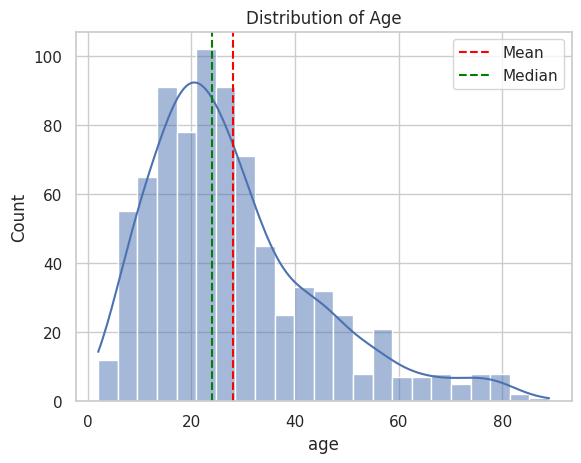

In [25]:
sns.histplot(data["age"], kde = True)
plt.title("Distribution of Age")

age_mean = data["age"].mean()
age_median = data["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)

plt.axvline(age_mean, color = "red", linestyle = "--", label = "Mean")
plt.axvline(age_median, color = "green", linestyle = "--", label = "Median")
plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


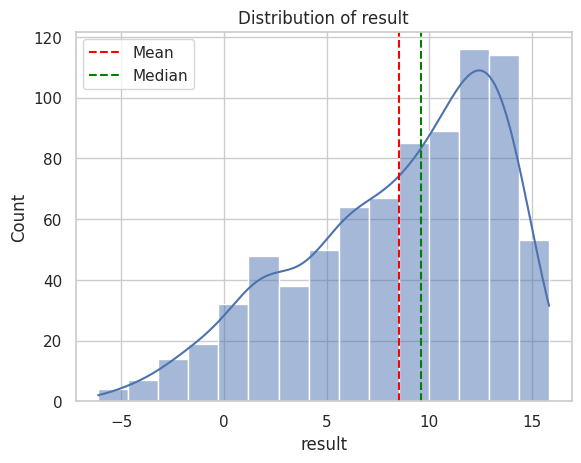

In [26]:
sns.histplot(data["result"], kde = True)
plt.title("Distribution of result")

result_mean = data["result"].mean()
result_median = data["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)

plt.axvline(result_mean, color = "red", linestyle = "--", label = "Mean")
plt.axvline(result_median, color = "green", linestyle = "--", label = "Median")
plt.legend()

plt.show()

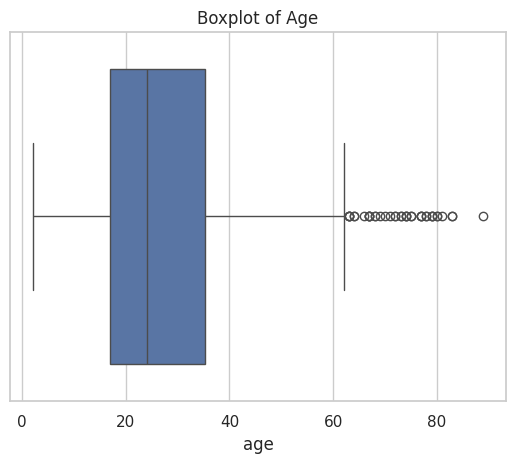

In [27]:
sns.boxplot(x = data["age"])
plt.title("Boxplot of Age")
plt.show()

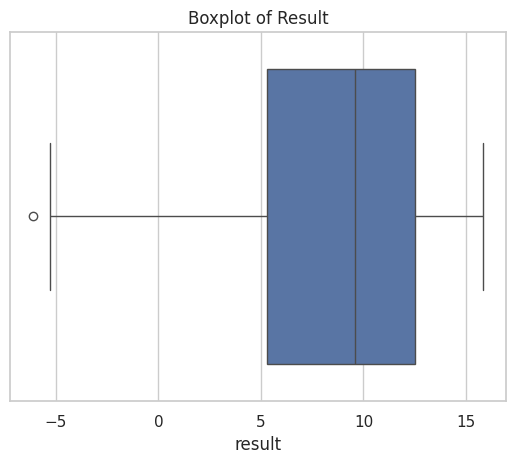

In [28]:
sns.boxplot(x = data["result"])
plt.title("Boxplot of Result")
plt.show()

In [29]:
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]

In [30]:
outliers.shape

(39, 20)

In [31]:
Q1 = data["result"].quantile(0.25)
Q3 = data["result"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["result"] < lower_bound) | (data["result"] > upper_bound)]

In [32]:
outliers.shape

(1, 20)

In [33]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [34]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation',]

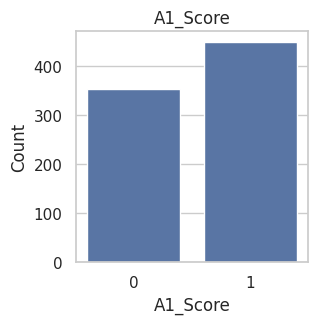

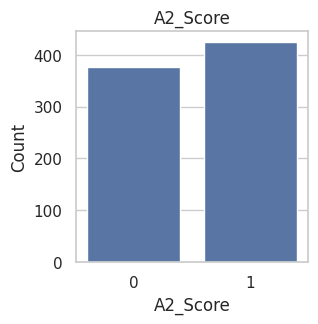

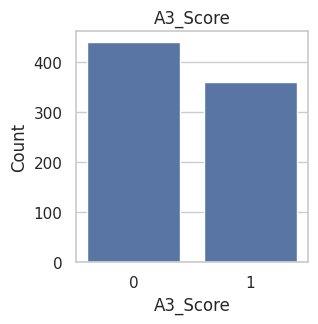

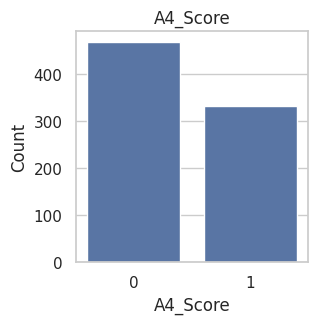

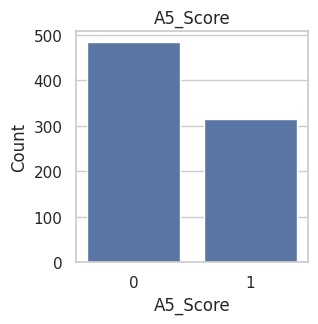

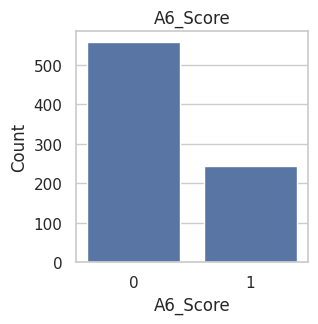

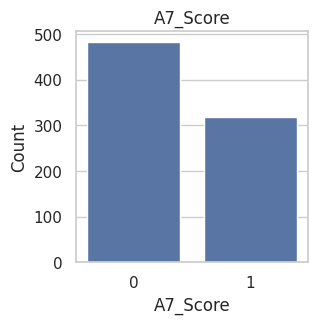

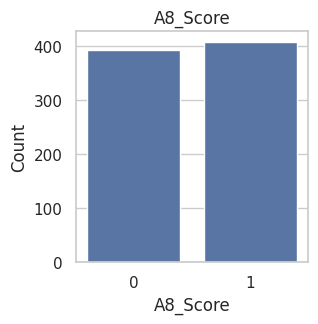

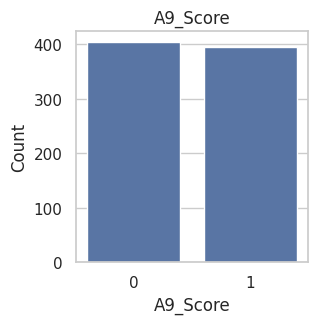

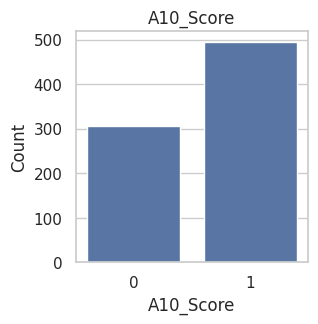

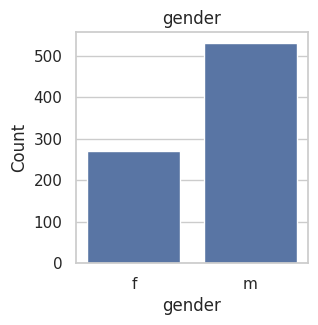

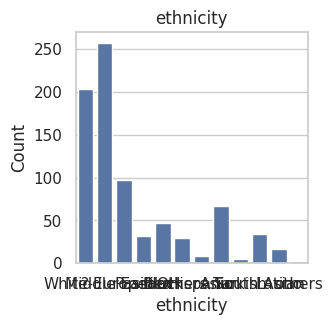

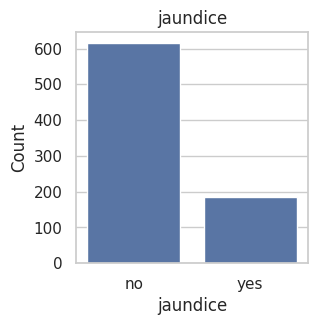

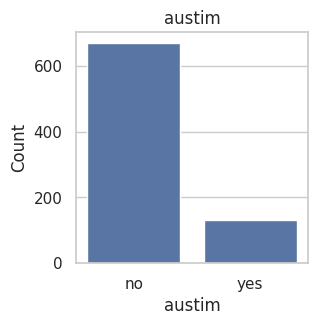

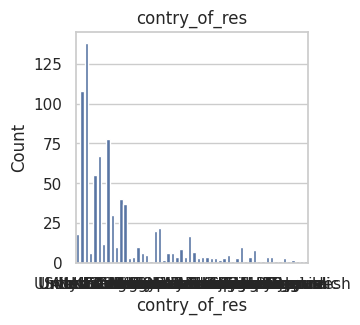

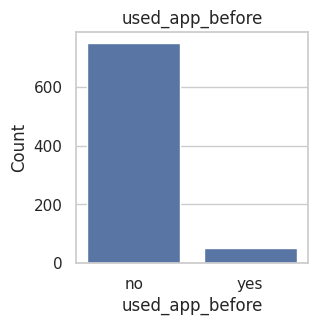

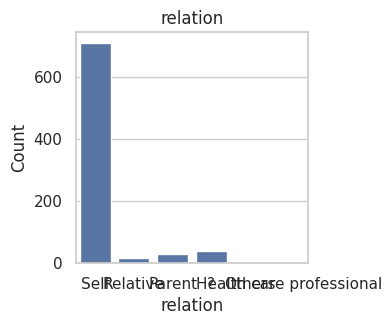

In [35]:
for col in categorical_columns:
  plt.figure(figsize = (3,3))
  sns.countplot(x = data[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

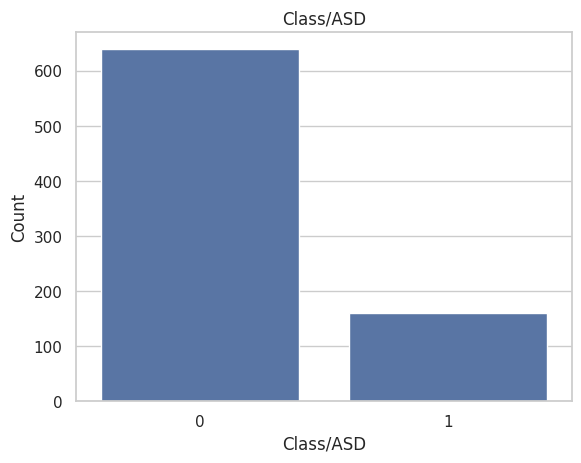

In [36]:
sns.countplot(x = data["Class/ASD"])
plt.title("Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [37]:
data["ethnicity"] = data["ethnicity"].replace({"?" : "Others", "others" : "Others"})

In [38]:
data.relation.unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [39]:
data["relation"] = data["relation"].replace({"?" : "Others",\
                                             "Relative" : "Others",\
                                             "Parent" : "Others",\
                                             "Health care professional" : "Others"})

In [40]:
data.relation.unique()

array(['Self', 'Others'], dtype=object)

In [41]:
object_columns = data.select_dtypes(include = ["object"]).columns

In [42]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [43]:
encoder = {}
for col in object_columns:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  encoder[col] = le

with open("encoder.pkl", "wb") as f:
  pickle.dump(encoder, f)

In [44]:
encoder

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [45]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


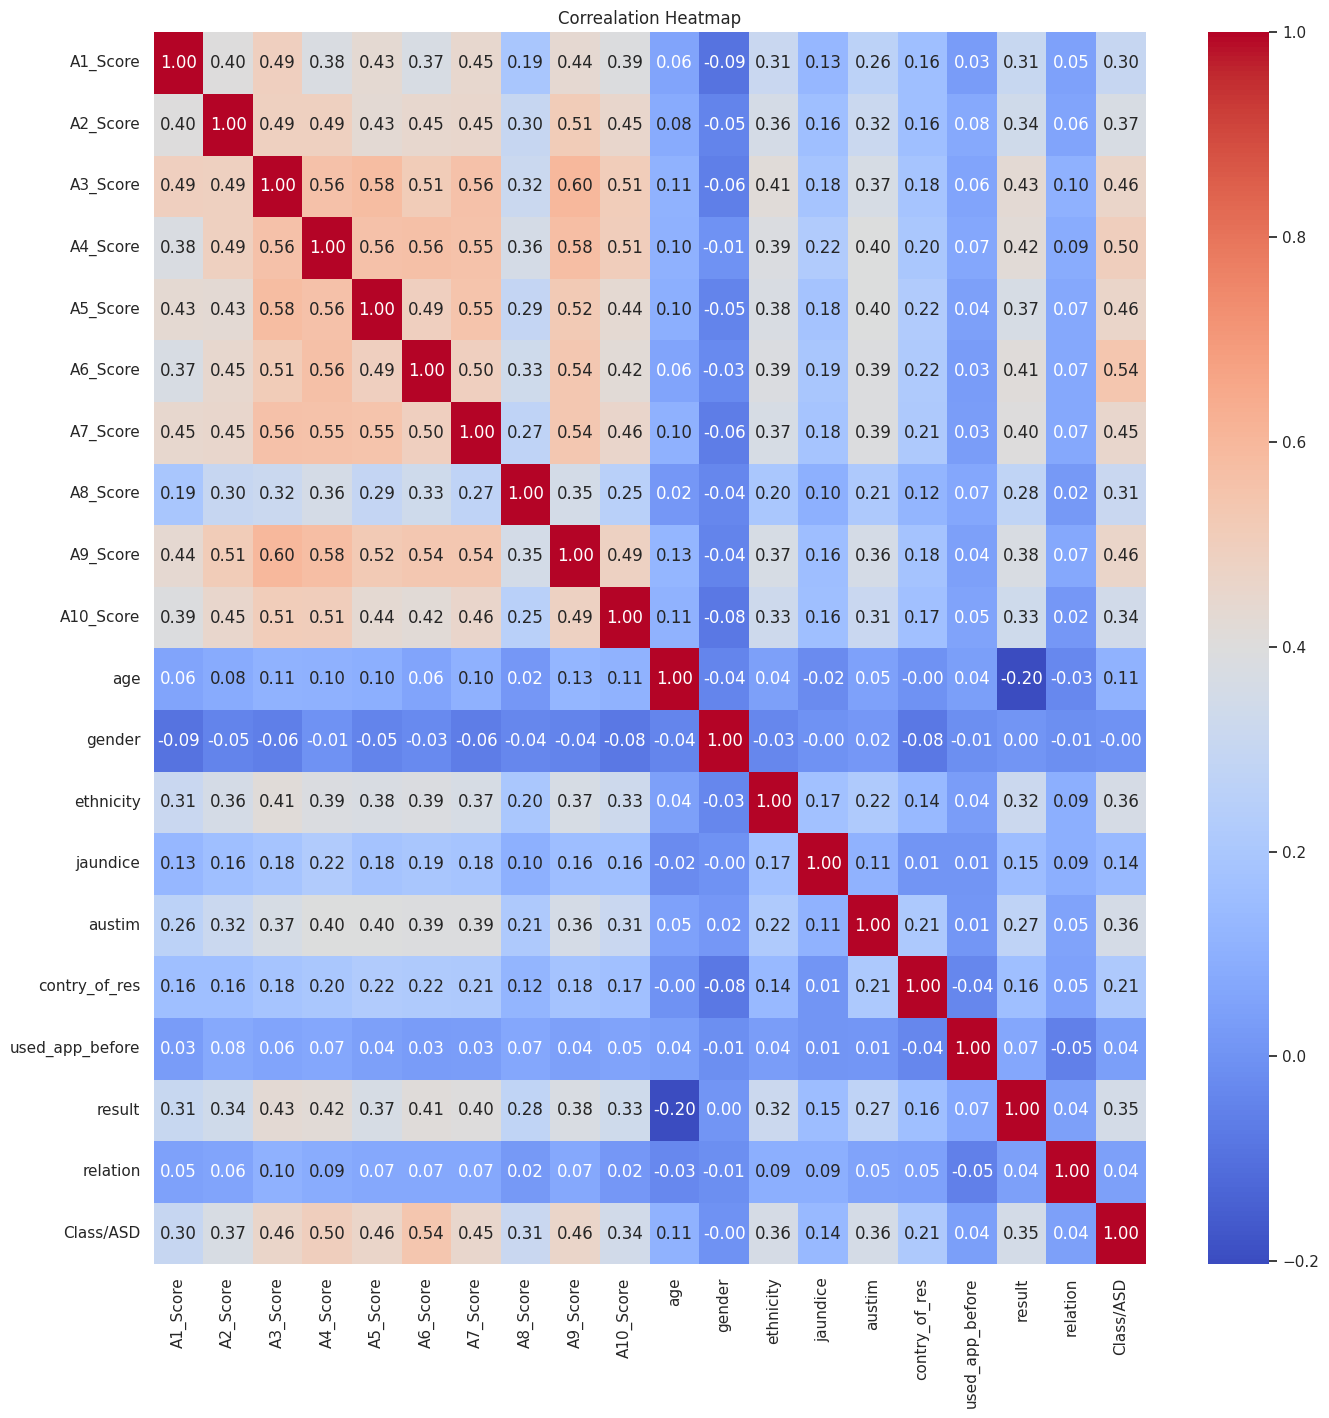

In [46]:
plt.figure(figsize = (16,16))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correalation Heatmap")
plt.show()

In [47]:
def replace_outliers_with_median(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3- Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  med = data[column].median()

  data[column] = data[column].apply(lambda x : med if x < lower_bound or x > upper_bound else x)
  return data

In [48]:
data = replace_outliers_with_median(data, "age")

In [49]:
data = replace_outliers_with_median(data, "result")

In [50]:
X = data.drop(columns = ["Class/ASD"], axis = 1)
Y = data["Class/ASD"]

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 16)

In [52]:
X_train.shape

(640, 19)

In [53]:
Y_train.value_counts()

,count
Class/ASD,
0,518
1,122


In [54]:
smote = SMOTE(random_state = 16)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [55]:
Y_train_smote.value_counts()

,count
Class/ASD,
0,518
1,518


In [56]:
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 16),
    "Random Forest" : RandomForestClassifier(random_state = 16),
    "XGBoost" : XGBClassifier(random_state = 16)
}

In [57]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=16), 'Random Forest': RandomForestClassifier(random_state=16), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=16, ...)}


In [58]:
cv_scores = {}

for model_name, model in models.items():
  print(model_name)
  cv_score = cross_val_score(model, X_train_smote, Y_train_smote, cv = 5, scoring = "accuracy")
  cv_scores[model_name] = cv_score
  print(f"{model_name} CV Score : {cv_score.mean()}")
  print("-"*50)

Decision Tree
Decision Tree CV Score : 0.8398411371237458
--------------------------------------------------
Random Forest
Random Forest CV Score : 0.9083240431066517
--------------------------------------------------
XGBoost
XGBoost CV Score : 0.9054440728353772
--------------------------------------------------


In [59]:
cv_scores

{'Decision Tree': array([0.76442308, 0.8115942 , 0.84057971, 0.89371981, 0.88888889]),
 'Random Forest': array([0.88461538, 0.88405797, 0.90821256, 0.9468599 , 0.9178744 ]),
 'XGBoost': array([0.86538462, 0.86956522, 0.91304348, 0.95169082, 0.92753623])}

In [60]:
d_tree = DecisionTreeClassifier(random_state = 16)
random_forest = RandomForestClassifier(random_state = 16)
xgboost = XGBClassifier(random_state = 16)

In [61]:
param_grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 5, 10, 15, 20, 30, 50, 70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

param_grid_rf = {
    "n_estimators" : [50, 100, 200, 500, 1000],
    "max_depth" : [None, 5, 10, 15, 20, 30, 50, 70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "bootstrap" : [True, False]
}

param_grid_xgb = {
    "n_estimators" : [50, 100, 200, 500, 1000],
    "learning_rate" : [0.01, 0.05, 0.1, 0.2, 0.3],
    "max_depth" : [3, 5, 7, 10, 15],
    "subsample" : [0.5, 0.7, 1.0],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.5, 0.7, 1.0]
}

In [62]:
random_search_dt = RandomizedSearchCV(estimator = d_tree, param_distributions = param_grid_dt, n_iter = 10, cv = 5, scoring = "accuracy", random_state = 16)
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid_rf, n_iter = 10, cv = 5, scoring = "accuracy", random_state = 16)
random_search_xgb = RandomizedSearchCV(estimator = xgboost, param_distributions = param_grid_xgb, n_iter = 10, cv = 5, scoring = "accuracy", random_state = 16)

In [63]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=16, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=16, scoring='accuracy')

In [64]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

In [65]:
print("Best Model ", best_model)
print("Best Score ", best_score)

Best Model  RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=1000, random_state=16)
Best Score  0.9141257896692678


In [66]:
with open ("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [67]:
pred = best_model.predict(X_test)
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.84375
[[106  15]
 [ 10  29]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.66      0.74      0.70        39

    accuracy                           0.84       160
   macro avg       0.79      0.81      0.80       160
weighted avg       0.85      0.84      0.85       160

